In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import *

In [2]:
from configparser import ConfigParser
config = ConfigParser()
config.read('params.txt', encoding='UTF-8')
ex = '202111'
traffic_path = config[ex]['traffic_path']
adj01_path = config[ex]['adj01_path']
adjdis_path = config[ex]['adjdis_path']
adj01_path_csv = config[ex]['adj01_path_csv']
adjdis_path_csv = config[ex]['adjdis_path_csv']
road_path = config[ex]['road_path']
N_link = config.getint(ex, 'N_link')
train_month = eval(config[ex]['train_month'])
test_month = eval(config[ex]['test_month'])

In [3]:
data = pd.read_csv(traffic_path)
data

,linkid,gps_timestamp,speed_typea,accident_flag,real_accident_flag
0,83585420,2021-11-01 00:00:00,57.542381,0,0
1,83585420,2021-11-01 00:10:00,68.051068,0,0
2,83585420,2021-11-01 00:20:00,68.478056,0,0
3,83585420,2021-11-01 00:30:00,76.661048,0,0
4,83585420,2021-11-01 00:40:00,76.188333,0,0
...,...,...,...,...,...
12273115,118770567,2021-11-30 23:10:00,45.491071,0,0
12273116,118770567,2021-11-30 23:20:00,46.848750,0,0
12273117,118770567,2021-11-30 23:30:00,57.381444,0,0
12273118,118770567,2021-11-30 23:40:00,45.690000,0,0


In [4]:
road = pd.read_csv(road_path, index_col=0)
road

,link_id,roadname,start_lon,start_lat
0,83585420,首都高速湾岸線,139.619143,35.387906
1,83585485,首都高速湾岸線,139.621790,35.385592
2,83585609,首都高速湾岸線,139.619928,35.401124
3,83585658,首都高速湾岸線,139.618685,35.399099
4,83585806,首都高速湾岸線,139.620011,35.401487
...,...,...,...,...
2836,117632419,首都高速１号羽田線,139.743186,35.584685
2837,118415091,首都高速５号池袋線,139.679243,35.776074
2838,118415100,首都高速５号池袋線,139.679592,35.775901
2839,118770411,首都高速中央環状線,139.755178,35.601133


In [40]:
road.groupby('roadname').size()

roadname
首都高速中央環状線        305
首都高速八重洲線          44
首都高速埼玉大宮線         53
首都高速埼玉新都心線        62
首都高速川口線           98
首都高速湾岸線          596
首都高速神奈川１号横羽線     240
首都高速神奈川２号三ツ沢線     35
首都高速神奈川３号狩場線     122
首都高速神奈川５号大黒線      24
首都高速神奈川６号川崎線      51
首都高速神奈川７号横浜北線     49
首都高速都心環状線        253
首都高速１号上野線         40
首都高速１号羽田線        119
首都高速１０号晴海線        13
首都高速１１号台場線        39
首都高速２号目黒線         30
首都高速３号渋谷線         83
首都高速４号新宿線        137
首都高速５号池袋線        160
首都高速６号三郷線         87
首都高速６号向島線         98
首都高速７号小松川線        41
首都高速９号深川線         62
dtype: int64

In [51]:
select_road =[
    # "首都高速埼玉大宮線",
    # "首都高速埼玉新都心線",
    # "首都高速神奈川１号横羽線",
    # "首都高速神奈川２号三ツ沢線",
    # "首都高速神奈川３号狩場線",
    # "首都高速神奈川５号大黒線",
    # "首都高速神奈川６号川崎線",
    # "首都高速神奈川７号横浜北線"
    # "首都高速湾岸線",
    "首都高速川口線",
    "首都高速都心環状線",
    "首都高速中央環状線",
    "首都高速八重洲線",
    "首都高速１号羽田線",
    "首都高速１号上野線",
    "首都高速３号渋谷線",
    "首都高速２号目黒線",
    "首都高速４号新宿線",
    "首都高速５号池袋線",
    "首都高速６号向島線",
    "首都高速６号三郷線",
    "首都高速７号小松川線",
    "首都高速９号深川線",
    "首都高速１０号晴海線",
    "首都高速１１号台場線",
]

In [52]:
sub_road = road.loc[road.roadname.isin(select_road)]
sub_road

,link_id,roadname,start_lon,start_lat
509,84226601,首都高速１号羽田線,139.759173,35.650911
510,84226626,首都高速１号羽田線,139.758555,35.649692
511,84226643,首都高速１号羽田線,139.758242,35.649076
512,84226764,首都高速１号羽田線,139.755206,35.642984
513,84226877,首都高速１号羽田線,139.752246,35.637261
...,...,...,...,...
2836,117632419,首都高速１号羽田線,139.743186,35.584685
2837,118415091,首都高速５号池袋線,139.679243,35.776074
2838,118415100,首都高速５号池袋線,139.679592,35.775901
2839,118770411,首都高速中央環状線,139.755178,35.601133


In [53]:
sub_road.to_csv('Tokyo_road_info.csv')

In [54]:
sub_road.index.values

array([ 509,  510,  511, ..., 2838, 2839, 2840])

In [55]:
np.savetxt('/data2/jiang/Toyota/graph_data/Tokyo_road_idx.csv', sub_road.index.values, fmt='%d')

In [58]:
road_idx = np.loadtxt('/data2/jiang/Toyota/graph_data/Tokyo_road_idx.csv').astype(int)
road_idx

array([ 509,  510,  511, ..., 2838, 2839, 2840])

In [31]:
df = pd.merge(data, road[['link_id', 'start_lon', 'start_lat', 'roadname']], left_on='linkid', right_on='link_id')
df.drop('link_id', axis=1, inplace=True)
df

,linkid,gps_timestamp,speed_typea,accident_flag,real_accident_flag,start_lon,start_lat,roadname
0,83585420,2021-11-01 00:00:00,57.542381,0,0,139.619143,35.387906,首都高速湾岸線
1,83585420,2021-11-01 00:10:00,68.051068,0,0,139.619143,35.387906,首都高速湾岸線
2,83585420,2021-11-01 00:20:00,68.478056,0,0,139.619143,35.387906,首都高速湾岸線
3,83585420,2021-11-01 00:30:00,76.661048,0,0,139.619143,35.387906,首都高速湾岸線
4,83585420,2021-11-01 00:40:00,76.188333,0,0,139.619143,35.387906,首都高速湾岸線
...,...,...,...,...,...,...,...,...
12273115,118770567,2021-11-30 23:10:00,45.491071,0,0,139.755087,35.600254,首都高速中央環状線
12273116,118770567,2021-11-30 23:20:00,46.848750,0,0,139.755087,35.600254,首都高速中央環状線
12273117,118770567,2021-11-30 23:30:00,57.381444,0,0,139.755087,35.600254,首都高速中央環状線
12273118,118770567,2021-11-30 23:40:00,45.690000,0,0,139.755087,35.600254,首都高速中央環状線


(array([2.892990e+05, 4.675020e+05, 5.978780e+05, 7.217500e+05,
        9.512290e+05, 1.270514e+06, 1.603935e+06, 2.007458e+06,
        2.027176e+06, 1.385888e+06, 7.164750e+05, 1.720080e+05,
        4.328900e+04, 1.274700e+04, 3.768000e+03, 1.297000e+03,
        5.360000e+02, 2.470000e+02, 9.600000e+01, 2.800000e+01]),
 array([ -1.        ,   8.19483333,  17.38966667,  26.5845    ,
         35.77933333,  44.97416667,  54.169     ,  63.36383333,
         72.55866667,  81.7535    ,  90.94833333, 100.14316667,
        109.338     , 118.53283333, 127.72766667, 136.9225    ,
        146.11733333, 155.31216667, 164.507     , 173.70183333,
        182.89666667]),
 <BarContainer object of 20 artists>)

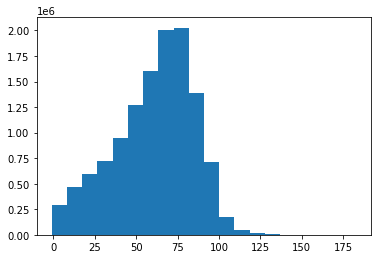

In [59]:
plt.hist(df.speed_typea.values, bins=20)

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
speeds = df.speed_typea.values.reshape(-1, 2841)
speeds.shape

(4320, 2841)

(array([2.141420e+05, 4.518150e+05, 5.775930e+05, 7.014420e+05,
        9.080300e+05, 1.230298e+06, 1.555834e+06, 1.965016e+06,
        2.083063e+06, 1.501521e+06, 7.131600e+05, 2.991160e+05,
        5.102400e+04, 1.447700e+04, 4.213000e+03, 1.271000e+03,
        7.040000e+02, 2.660000e+02, 1.050000e+02, 3.000000e+01]),
 array([-2.64888596, -2.26267662, -1.87646728, -1.49025794, -1.1040486 ,
        -0.71783926, -0.33162992,  0.05457942,  0.44078876,  0.8269981 ,
         1.21320744,  1.59941678,  1.98562613,  2.37183547,  2.75804481,
         3.14425415,  3.53046349,  3.91667283,  4.30288217,  4.68909151,
         5.07530085]),
 <BarContainer object of 20 artists>)

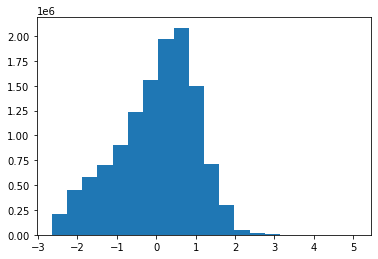

In [61]:
speeds = scaler.fit_transform(speeds)
plt.hist(speeds.ravel(), bins=20)

In [32]:
df.describe()

,linkid,speed_typea,accident_flag,real_accident_flag,start_lon,start_lat
count,1.227312e+07,1.227312e+07,1.227312e+07,1.227312e+07,1.227312e+07,1.227312e+07
mean,8.690302e+07,6.068864e+01,1.054720e-02,3.934615e-04,1.397337e+02,3.563294e+01
std,6.364489e+06,2.394783e+01,1.021565e-01,1.983196e-02,7.318312e-02,1.214380e-01
min,8.358542e+07,-1.000000e+00,0.000000e+00,0.000000e+00,1.395781e+02,3.536105e+01
25%,8.423892e+07,4.530155e+01,0.000000e+00,0.000000e+00,1.396782e+02,3.552142e+01
50%,8.560301e+07,6.453333e+01,0.000000e+00,0.000000e+00,1.397459e+02,3.565371e+01
75%,8.655159e+07,7.822018e+01,0.000000e+00,0.000000e+00,1.397831e+02,3.569513e+01
max,1.187706e+08,9.990000e+02,1.000000e+00,1.000000e+00,1.399466e+02,3.589875e+01


In [33]:
df.loc[(df.speed_typea>200), 'speed_typea'] = 100.0

In [34]:
df[(df.speed_typea>180)]

,linkid,gps_timestamp,speed_typea,accident_flag,real_accident_flag,start_lon,start_lat,roadname
511655,83593158,2021-11-14 03:50:00,180.510000,0,0,139.724286,35.483164,首都高速湾岸線
1022694,83601623,2021-11-23 01:00:00,182.896667,0,0,139.769978,35.563902,首都高速湾岸線
7546899,85756710,2021-11-30 00:30:00,180.095000,0,0,139.849588,35.668796,首都高速中央環状線


In [35]:
df_tmp = df[(df.gps_timestamp >= '2021-11-01 00:00:00') & (df.gps_timestamp < '2021-11-02 00:00:00')]
df_tmp

,linkid,gps_timestamp,speed_typea,accident_flag,real_accident_flag,start_lon,start_lat,roadname
0,83585420,2021-11-01 00:00:00,57.542381,0,0,139.619143,35.387906,首都高速湾岸線
1,83585420,2021-11-01 00:10:00,68.051068,0,0,139.619143,35.387906,首都高速湾岸線
2,83585420,2021-11-01 00:20:00,68.478056,0,0,139.619143,35.387906,首都高速湾岸線
3,83585420,2021-11-01 00:30:00,76.661048,0,0,139.619143,35.387906,首都高速湾岸線
4,83585420,2021-11-01 00:40:00,76.188333,0,0,139.619143,35.387906,首都高速湾岸線
...,...,...,...,...,...,...,...,...
12268939,118770567,2021-11-01 23:10:00,45.491071,0,0,139.755087,35.600254,首都高速中央環状線
12268940,118770567,2021-11-01 23:20:00,46.848750,0,0,139.755087,35.600254,首都高速中央環状線
12268941,118770567,2021-11-01 23:30:00,57.381444,0,0,139.755087,35.600254,首都高速中央環状線
12268942,118770567,2021-11-01 23:40:00,45.690000,0,0,139.755087,35.600254,首都高速中央環状線


In [36]:
df_tmp.to_csv('20211101_traffc.csv', index=None)

In [10]:
adj01 = pd.read_csv(adj01_path_csv, index_col=0)
adj01

,83585420,83585485,83585609,83585658,83585806,83585863,83585888,83586020,83586069,83586126,...,117489955,117490052,117490417,117490530,117590330,117632419,118415091,118415100,118770411,118770567
83585420,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83585485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83585609,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83585658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83585806,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117632419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118415091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
118415100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118770411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
np.sum(adj01.values)

2982

In [12]:
adjdis = pd.read_csv(adjdis_path_csv, index_col=0)
adjdis

,83585420,83585485,83585609,83585658,83585806,83585863,83585888,83586020,83586069,83586126,...,117489955,117490052,117490417,117490530,117590330,117632419,118415091,118415100,118770411,118770567
83585420,0.000000,351.816566,1471.535666,1245.362499,1512.158796,1247.581686,1146.442049,184.127549,78.439965,394.508282,...,32558.440172,32821.264591,32816.415779,33076.921561,44655.544050,24594.899411,43503.256550,43488.064393,189639.548154,26627.041069
83585485,351.816566,0.000000,1735.274512,1528.058787,1774.691262,1536.703500,1446.581847,535.203392,283.485934,56.471735,...,32670.940007,32938.999152,32934.243273,33200.832379,44691.772761,24716.569962,43729.404504,43714.004330,189798.859028,26746.494071
83585609,1471.535666,1735.274512,0.000000,251.776661,40.985860,274.119358,396.398876,1334.485660,1545.616446,1791.407541,...,31240.782668,31493.150435,31488.121440,31736.866500,43513.938890,23262.302472,42036.180920,42021.079497,190121.606537,25297.805149
83585658,1245.362499,1528.058787,251.776661,0.000000,291.379224,43.667329,148.844425,1099.123510,1321.284395,1583.453246,...,31492.167096,31744.733215,31739.707052,31988.594723,43756.123962,23513.921767,42273.918744,42258.883630,189949.498018,25549.382489
83585806,1512.158796,1774.691262,40.985860,291.379224,0.000000,311.936702,434.554726,1375.427231,1586.141438,1830.861871,...,31202.102457,31454.249822,31449.217099,31697.718904,43479.185152,23223.353283,41995.258799,41980.155554,190140.259059,25258.912786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117632419,24594.899411,24716.569962,23262.302472,23513.921767,23223.353283,23534.861143,23657.578248,24514.183003,24651.338997,24767.522601,...,7997.599242,8231.509153,8226.385046,8485.506569,21660.889896,0.000000,22051.265221,22024.385377,207273.698691,2038.353542
118415091,43503.256550,43729.404504,42036.180920,42273.918744,41995.258799,42279.584047,42393.812333,43370.619312,43574.886021,43785.566402,...,17785.328552,17205.382165,17199.451868,16539.452771,25899.614713,22051.265221,0.000000,36.961837,210668.717422,20715.572429
118415100,43488.064393,43714.004330,42021.079497,42258.883630,41980.155554,42264.583526,42378.847578,43355.526348,43559.669101,43770.161675,...,17751.475602,17171.529189,17165.606267,16505.657342,25863.177755,22024.385377,36.961837,0.000000,210688.021530,20686.935544
118770411,189639.548154,189798.859028,190121.606537,189949.498018,190140.259059,189907.630106,189820.182439,189575.043212,189640.624584,189782.505550,...,213820.647592,213695.530593,213685.921939,213491.303589,228541.941507,207273.698691,210668.717422,210688.021530,0.000000,208902.734756


In [13]:
# np.save('/data2/jiang/Toyota/graph_data/adj01.npy', adj01.values)
# np.save('/data2/jiang/Toyota/graph_data/adjdis.npy', adjdis.values)

In [14]:
adjdis_ = adjdis.values
adjdis_.min(), adjdis_.max()
# adjdis_[adjdis_==0] = np.inf 

(0.0, 996708.5871775156)

In [15]:
def weight_matrix(W, sigma2=0.1, epsilon=0.5):
    '''
    :param sigma2: float, scalar of matrix W.
    :param epsilon: float, thresholds to control the sparsity of matrix W.
    :param scaling: bool, whether applies numerical scaling on W.
    :return: np.ndarray, [n_route, n_route].
    '''
    n = W.shape[0]
    W = W /10000
    W[W==0]=np.inf
    W2 = W * W
    W_mask = (np.ones([n, n]) - np.identity(n))
    return np.exp(-W2 / sigma2) * (np.exp(-W2 / sigma2) >= epsilon) * W_mask

In [16]:
# -(996708.5871775156/10000)**2/x = log0.5
# (-np.log(0.5))
# np.sqrt(-np.log(0.5)*0.1) * 10000

In [17]:
W1 = weight_matrix(adjdis.values, sigma2=0.1)
W2 = weight_matrix(adjdis.values, sigma2=1)
W3 = weight_matrix(adjdis.values, sigma2=10)

(array([2260835.,       0.,       0.,       0.,       0.,  674324.,
         736052.,  956126., 1209916., 2234028.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

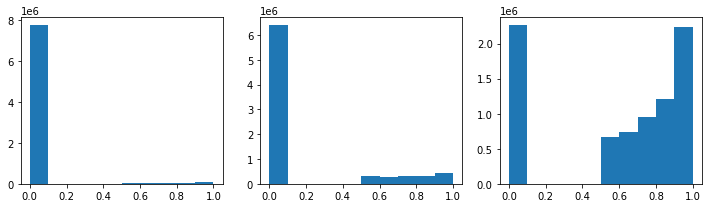

In [18]:
fig, ax = plt.subplots(1,3,tight_layout=True, figsize=(10,3))
ax[0].hist(W1.ravel())
ax[1].hist(W2.ravel())
ax[2].hist(W3.ravel())

In [19]:
train_month, test_month

(['202105', '202110'], ['202111'])

In [20]:
# for month in ['202105', '202110', '202111']:
#     data = get_data(config[month]['data_path'], N_link)
#     np.save('./data/TrafficSpeedIncidentAccident_{}.npy'.format(month), data)

In [21]:
train_data = [get_data(config[month]['traffic_path'], N_link) for month in train_month]
test_data = [get_data(config[month]['traffic_path'], N_link) for month in test_month]

for d in train_data:
    print(d.shape)
for d in test_data:
    print(d.shape)

(4464, 2841, 3)
(4464, 2841, 3)
(4320, 2841, 3)


In [22]:
trainXS, trainYS = getXSYS(train_data, 6, 6)
testXS, testYS = getXSYS(test_data, 6, 6)
print(trainXS.shape, trainYS.shape)
print(testXS.shape, testYS.shape)

(8906, 6, 2841, 3) (8906, 6, 2841, 3)
(4309, 6, 2841, 3) (4309, 6, 2841, 3)


In [23]:
timeslots = [i.strftime('%Y-%m-%d %H:%M:%S') for i in pd.date_range(start='2021-11-01 00:00:00', end='2021-11-30 23:59:59', freq='10min')]
print(len(timeslots))

4320


In [24]:
4320*2841

12273120